**Zadanie 1 Laboratorium Statystycznej Eksploracji Danych**

**Autor:** Mateusz Wasiluk

**Cel ćwiczenia:** Analiza PCA dla zbioru win.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('wine.txt', sep=",", header=None)
data.columns = 'Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,\
Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline'.split(',') 

In [3]:
data.head()

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [4]:
labels = data['Label']
data = data.drop(['Label'], axis=1)

In [5]:
pca = PCA(n_components=len(data.columns))

In [6]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
evr = pca.explained_variance_ratio_

In [8]:
cumul_evr = np.cumsum(evr)

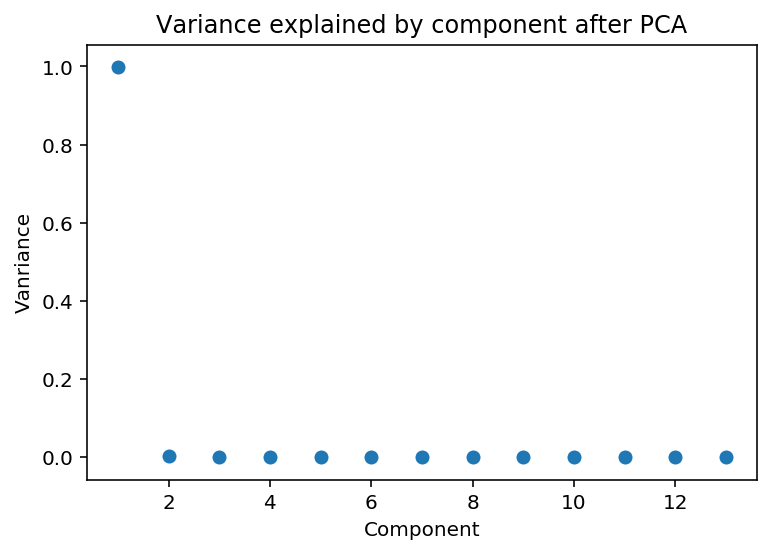

In [9]:
fig, ax = plt.subplots(dpi=144); 
ax.scatter(range(1, 14), evr);
ax.set_xlabel('Component'); 
ax.set_ylabel('Vanriance');
ax.set_title('Variance explained by component after PCA')
plt.show()

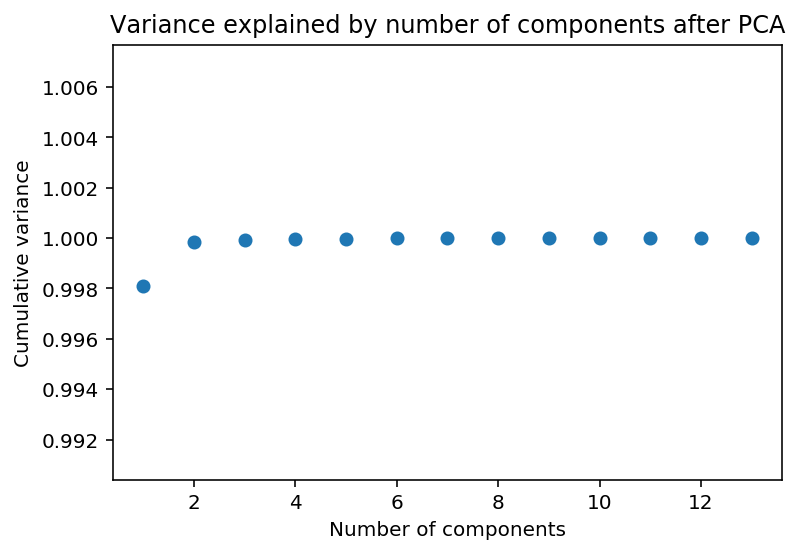

In [10]:
fig, ax = plt.subplots(dpi=144); 
ax.scatter(range(1, 14), cumul_evr);
ax.set_xlabel('Number of components'); 
ax.set_ylabel('Cumulative variance');
ax.set_title('Variance explained by number of components after PCA')
plt.show()

In [11]:
data_pca = pca.transform(data)

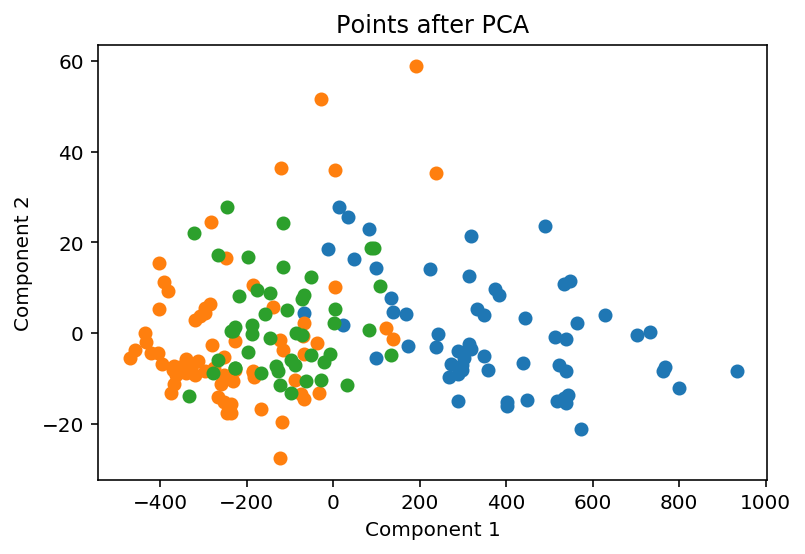

In [12]:
fig, ax = plt.subplots(dpi=144); 
ax.scatter(data_pca[labels==1][:, 0], data_pca[labels==1][:, 1], label='Class 1');
ax.scatter(data_pca[labels==2][:, 0], data_pca[labels==2][:, 1], label='Class 2');
ax.scatter(data_pca[labels==3][:, 0], data_pca[labels==3][:, 1], label='Class 3');

ax.set_xlabel('Component 1'); 
ax.set_ylabel('Component 2');
ax.set_title('Points after PCA')
plt.show()

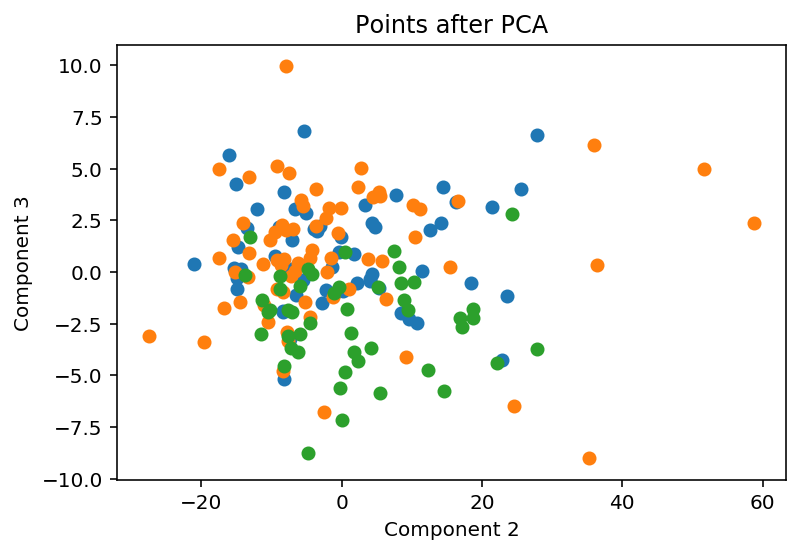

In [13]:
fig, ax = plt.subplots(dpi=144); 
ax.scatter(data_pca[labels==1][:, 1], data_pca[labels==1][:, 2], label='Class 1');
ax.scatter(data_pca[labels==2][:, 1], data_pca[labels==2][:, 2], label='Class 2');
ax.scatter(data_pca[labels==3][:, 1], data_pca[labels==3][:, 2], label='Class 3');
ax.set_xlabel('Component 2'); 
ax.set_ylabel('Component 3');
ax.set_title('Points after PCA')
plt.show()

Wnioski: Wykorzystanie pierwszej składowej po transformacji PCA pozwala zachować ok. 99.8% variancji w danych wejściowych. Stosunkowo dobrą separację obserwacji przy użyciu pierwszej i drugiej składowej widać również na wykresie położeń punktów w tych składowych, w przeciwieństwie do składowych drugiej i trzeciej. Wobec tego, w ewentualnych dalszych pracach można by zaoszczędzić zasoby obliczeniowe i pamięciowe, używając jedynie pierwszej/pierwszych dwóch składowych po transformacji.